In [124]:
import numpy as np
import matplotlib.pyplot as plt
import ipeadatapy
from statsmodels.tsa import arima_process
from statsmodels.tsa.arima.model import ARIMA

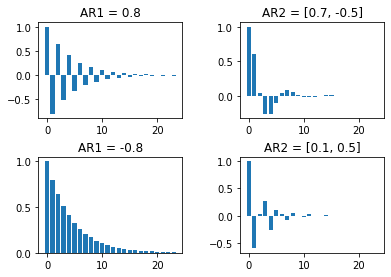

In [56]:
fig, axs = plt.subplots(2,2)
axs[0,0].bar(np.arange(24),arima_process.ArmaProcess(ar = [1, 0.8], nobs= 200).acf(24))
axs[0,0].set_title("AR1 = 0.8")
axs[1,0].bar(np.arange(24),arima_process.ArmaProcess(ar = [1,-0.8], nobs= 200).acf(24))
axs[1,0].set_title("AR1 = -0.8")
axs[0,1].bar(np.arange(24),arima_process.ArmaProcess(ar = [1, -0.9, 0.5], nobs= 200).acf(24))
axs[0,1].set_title("AR2 = [0.7, -0.5]")
axs[1,1].bar(np.arange(24),arima_process.ArmaProcess(ar = [1, 0.9, 0.5], nobs= 200).acf(24))
axs[1,1].set_title("AR2 = [0.1, 0.5]")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


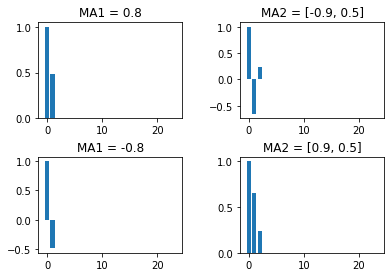

In [58]:
fig, axs2 = plt.subplots(2,2)
axs2[0,0].bar(np.arange(24),arima_process.ArmaProcess(ma = [1, 0.8], nobs= 200).acf(24))
axs2[0,0].set_title("MA1 = 0.8")
axs2[1,0].bar(np.arange(24),arima_process.ArmaProcess(ma = [1,-0.8], nobs= 200).acf(24))
axs2[1,0].set_title("MA1 = -0.8")
axs2[0,1].bar(np.arange(24),arima_process.ArmaProcess(ma = [1, -0.9, 0.5], nobs= 200).acf(24))
axs2[0,1].set_title("MA2 = [-0.9, 0.5]")
axs2[1,1].bar(np.arange(24),arima_process.ArmaProcess(ma = [1, 0.9, 0.5], nobs= 200).acf(24))
axs2[1,1].set_title("MA2 = [0.9, 0.5]")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


In [125]:
Sudeste = ipeadatapy.timeseries("ELETRO12_CEESE12")
Sudeste

,YEAR,DAY,MONTH,CODE,RAW DATE,VALUE (GWh)
DATE,,,,,,
1979-01-01,1979,1,1,ELETRO12_CEESE12,1979-01-01T00:00:00-02:00,5623.0
1979-02-01,1979,1,2,ELETRO12_CEESE12,1979-02-01T00:00:00-02:00,5551.0
1979-03-01,1979,1,3,ELETRO12_CEESE12,1979-03-01T00:00:00-03:00,5725.0
1979-04-01,1979,1,4,ELETRO12_CEESE12,1979-04-01T00:00:00-03:00,5797.0
1979-05-01,1979,1,5,ELETRO12_CEESE12,1979-05-01T00:00:00-03:00,6002.0
...,...,...,...,...,...,...
2021-06-01,2021,1,6,ELETRO12_CEESE12,2021-06-01T00:00:00-03:00,19481.0
2021-07-01,2021,1,7,ELETRO12_CEESE12,2021-07-01T00:00:00-03:00,19318.0
2021-08-01,2021,1,8,ELETRO12_CEESE12,2021-08-01T00:00:00-03:00,19567.0


In [134]:
ARIMA(Sudeste["VALUE (GWh)"], order = (0, 1, 1), seasonal_order = (1, 1, 1, 12)).fit().summary()

c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\joaquim\Desktop\Python_no_VSCode\myvenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      VALUE (GWh)   No. Observations:                  514
Model:             ARIMA(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3749.251
Date:                          Mon, 03 Jan 2022   AIC                           7506.502
Time:                                  09:34:26   BIC                           7523.368
Sample:                              01-01-1979   HQIC                          7513.120
                                   - 10-01-2021                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2785      0.029     -9.488      0.000      -0.336      -0.221
ar.S.L12       0.1245      0.052      2.377      0.017       0.022       0.227
ma.S.L12      -0.8767      0.034    -26.126      0.000      -0.942      -0.811
sigma2      1.797e+05   6874.094     26.139      0.000    1.66e+05    1.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               702.77
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""